1º ITEM

In [26]:
# Declarando os tamanhos da entrada
horas = [1,5,4,4,2,1,5,1,5,2,1,6,2,5,4,2,1,1,4,2,6,4,6,6,4]

# Declarando os tempos de acordo com a tabela
nota = [5,7,7,5,3,1,7,2,8,3,2,7,3,9,10,4,4,3,7,3,7,6,8,6,7]

In [27]:
import pandas as pd

dataFrame = pd.DataFrame({'horas de estudo' : horas, 'nota' : nota}, 
                         index = ['' for i in range(len(nota))])

print(dataFrame)

  horas de estudo  nota
                1     5
                5     7
                4     7
                4     5
                2     3
                1     1
                5     7
                1     2
                5     8
                2     3
                1     2
                6     7
                2     3
                5     9
                4    10
                2     4
                1     4
                1     3
                4     7
                2     3
                6     7
                4     6
                6     8
                6     6
                4     7


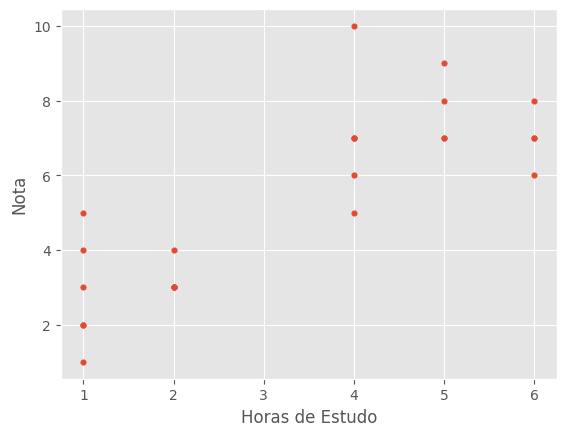

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.scatter(horas, nota, s = 15)
ax.set_xlabel('Horas de Estudo')
ax.set_ylabel('Nota')

##ax.set(xlim = (0, 41), ylim = (0.8, 1.7), xticks = np.linspace(0, 40, 21), yticks = np.linspace(0.8, 1.7, 19))

plt.show()

In [29]:
def f1(lista):
    soma = 0
    for x in lista:
        soma += x**2
    
    return soma

In [30]:
def f2(lista):
    soma = 0
    for x in lista:
        soma += x
    
    return soma

In [31]:
def f3(lista01, lista02):
    soma = 0
    for i in range(len(lista01)):
        soma += lista01[i]*lista02[i]

    return soma

In [32]:
from math import sqrt

def r(lista01, lista02):
    n = len(lista01)

    r = (n*f3(lista01, lista02)-f2(lista01)*f2(lista02))/(sqrt(n*f1(lista01)-f2(lista01)**2)*sqrt(n*f1(lista02)-f2(lista02)**2))

    return r

In [33]:
print('Coeficiente de correlação: r = {:.5f}'.format(r(horas, nota)))

Coeficiente de correlação: r = 0.82374


3º ITEM

$$t=\dfrac{r \sqrt{n-2}}{\sqrt{1-r^2}}$$

$$t^2\cdot (1-r^2)=r^2\cdot (n-2)$$

$$r^2\cdot (t^2+n-2)=t^2$$

$$r=\dfrac{t}{\sqrt{t^2+n-2}}$$

In [34]:
def t(r, n):
    return (r*sqrt(n-2))/(sqrt(1-r**2))

t(0.51, 25)

2.8434629934003253

In [35]:
def r(t, n):
    return t/sqrt(t**2 + n-2)

r(2.807, 25)

0.5051368455761986

In [36]:
def b(x, y):
    n = len(x)

    b = (n* f3(x,y)-f2(x)*f2(y))/(n*f1(x)-(f2(x))**2)
    return b

def a(x,y):
    n = len(x)

    a = (f2(y)- b(x,y)*f2(x))/n
    return a

print("{} + {}*x".format(a(horas, nota), b(horas, nota)))

1.759312320916905 + 1.0716332378223496*x


$$\dfrac{\partial S}{\partial \alpha}=\sum 2\left(Y_i-\alpha-\beta X_i\right)\cdot (-1)=0$$

$$\sum (y_i-\alpha-\beta x_i)=0$$

$$\sum y_i -\sum \alpha -\sum (\beta x_i)=0$$

$$\sum y_i - n\alpha -\beta \sum x_i=0$$

$$\boxed{\alpha = \dfrac{\sum y_i - \beta \sum x_i}{n}}$$

4º ITEM

In [37]:
def media(lista):
    total, soma = 0, 0
    for arg in lista:
        soma += arg
        total += 1

    return soma/total

In [40]:
def R(x, y):
    A = a(x, y)
    B = b(x,y)

    y_ = [A+B*i for i in x]
    y_medio = media(y)

    soma_numerador = 0
    for i in range(len(y_)):
        soma_numerador += (y_[i]-y_medio)**2

    soma_denominador = 0
    for i in range(len(y)):
        soma_denominador += (y[i]-y_medio)**2

    return soma_numerador/soma_denominador


R(horas, nota)

0.6785397815105397

5º ITEM

In [41]:
def f(x, y):
    n = len(x)

    gR = 1
    gE = n-2

    A = a(x, y)
    B = b(x,y)

    y_ = [A+B*i for i in x]
    y_medio = media(y)

    SQR = 0
    for k in y_:
        SQR += (k-y_medio)**2

    SQE = 0
    for i in range(len(y)):
        SQE = (y[i]-y_[i])**2

    QMR = SQR/gR

    QME = SQE/gE

    f = QMR/QME

    return f

f(horas, nota)

2430.0725633741854